In [1]:
import pandas as pd
import numpy as np
import mason_functions as mf
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set figure size
plt.rcParams["figure.figsize"] = (8,6)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.

For this exercise you'll need to install a library that will provide us access to some more datasets:

#### pip install vega_datasets

You can use this library like so:

#### from vega_datasets import data

#### data.sf_temps()


Use the above dataset for the exercises below:

1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [2]:
#import vega datasets
from vega_datasets import data

#set dataframe equal to data from sf_temps
df = data.sf_temps()

#check df
df

,temp,date
0,47.80,2010-01-01 00:00:00
1,47.40,2010-01-01 01:00:00
2,46.90,2010-01-01 02:00:00
3,46.50,2010-01-01 03:00:00
4,46.00,2010-01-01 04:00:00
...,...,...
8754,50.40,2010-12-31 19:00:00
8755,49.90,2010-12-31 20:00:00
8756,49.40,2010-12-31 21:00:00
8757,48.80,2010-12-31 22:00:00


In [3]:
#get dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [6]:
#set dataframe equal to df with date as the sorted index
df = df.set_index('date').sort_index()

In [7]:
#check it
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8759 entries, 2010-01-01 00:00:00 to 2010-12-31 23:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    8759 non-null   float64
dtypes: float64(1)
memory usage: 136.9 KB


In [8]:
#check df again
df

,temp
date,
2010-01-01 00:00:00,47.80
2010-01-01 01:00:00,47.40
2010-01-01 02:00:00,46.90
2010-01-01 03:00:00,46.50
2010-01-01 04:00:00,46.00
...,...
2010-12-31 19:00:00,50.40
2010-12-31 20:00:00,49.90
2010-12-31 21:00:00,49.40


In [12]:
#assign new dataframe to data resampled by day and aggregate by mean
temp_by_day = df.resample('D').mean()

temp_by_day

,temp
date,
2010-01-01,49.17
2010-01-02,49.30
2010-01-03,49.39
2010-01-04,49.45
2010-01-05,49.49
...,...
2010-12-27,48.99
2010-12-28,49.00
2010-12-29,49.01


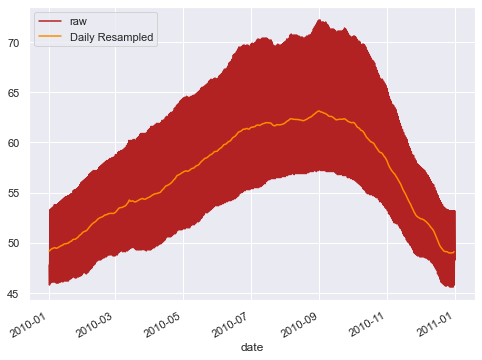

In [14]:
#visualize temperature over time
df.temp.plot(c = 'firebrick', label = 'raw')

#visualize temperature over time (days)
temp_by_day.temp.plot(c = 'darkorange', label = 'Daily Resampled')
plt.legend();

2. Write the code necessary to visualize the minimum temperature over time.

3. Write the code necessary to visualize the maximum temperature over time.

4. Which month is the coldest, on average?

5. Which month has the highest average temperature?

6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

#### 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.